# Методы классификации

_Автор признателен Ермакову Петру и Шестакову Андрею за их материалы к лекциям._

Классификации относятся к методам обучения с учителем, когда у нас уже имеются данные с разметкой по классам. Задачей классификации является формирование функции, разделяющей точки в некотором пространстве на отдельные классы. В дальнейшем эта функция будет использоваться для отнесения к классам точек с неизвестной принадлежностью.

Классификация основывается на гипотезе компактности, то есть гипотезе о том, что точки одного класса должны быть расположены рядом друг с другом.

## Метод k ближайших соседей (k-NN)

Метод основан на предположении, что если большинство из k ближайших соседей принадлежит определенному классу, то и данная точка также принадлежит данному классу.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, IntSlider, FloatSlider


Функция [make_moons](https://scikit-learn.org/0.20/modules/generated/sklearn.datasets.make_moons.html) генерирует две пересекающиеся полуокружности. Протестируем на таких данных метод k ближайших соседей.

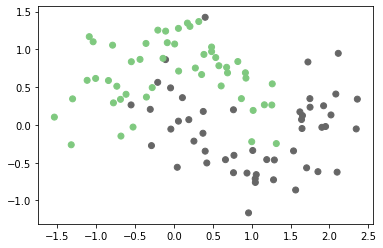

In [2]:
X, y = make_moons(noise=0.3, random_state=765)
_=plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Accent)

Для того, чтобы запустить метод, необходимо создать объект типа `KNeighborsClassifier`, передав туда параметры обучения:
- n_neighbors - количество соседей по которым ведется предсказание;
- weights - веса;
- metric - метрика измерения расстояния;
- n_jobs - количество потоков выполнения.

Для собственно обучения необходимо вызвать метод `fit`, в который передаются вектор параметров и вектор значений.

In [3]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Для четкого предсказания используется классов метод `predict`.

In [4]:
y_hat = knn.predict(X)

In [5]:
list(zip(y_hat, y))[:10]

[(1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0)]

Для нечеткого предсказания классов спользуется функция предсказания вероятности принадлежности точки всем классам `predict_proba`.

In [6]:
y_hat_proba = knn.predict_proba(X)
y_hat_proba[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

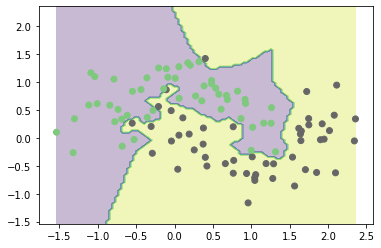

In [7]:
x_range = np.linspace(X.min(), X.max(), 100)

# всевозможные попарные значения признаков
xx1, xx2 = np.meshgrid(x_range, x_range)

Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
Y = Y.reshape(xx1.shape)

plt.contourf(xx1, xx2, Y, alpha=0.3)
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.Accent);

In [8]:
def plot_knn_neigh_count(k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='manhattan')
    knn.fit(X, y)
    x_range = np.linspace(X.min(), X.max(), 100)

    # всевозможные попарные значения признаков
    xx1, xx2 = np.meshgrid(x_range, x_range)

    Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
    Y = Y.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Y, alpha=0.3)
    plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.Accent);

In [9]:
fig = interact(plot_knn_neigh_count, k=IntSlider(min=1, max=10, value=1))

interactive(children=(IntSlider(value=1, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

### Классификация жертв и выживших с "Титаника"

Попробуем расклассифицировать жертв с "Титаника" методом k ближайших соседей.

In [10]:
train = pd.read_csv('data/00_titanic_train.csv')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Но сперва нам придется бороться с данными, так как не совсем понятно как считать расстояние между мужским и женским полом. Заменим категориальные значения на числовые.

In [13]:
train2=train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
train2['Sex']=train2['Sex'].replace({'male':1, 'female':0})
train2['Embarked']=train2['Embarked'].replace({'S':0, 'C':1, 'Q':2})

In [14]:
train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [15]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [16]:
train2.Age[train2.Age.isnull()]=np.random.normal(loc=train2.Age.median(), scale=3,
                                                 size=train2.Age[train2.Age.isnull()].shape[0])


/home/edward/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [18]:
train2=train2.dropna()
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null float64
dtypes: float64(3), int64(5)
memory usage: 62.5 KB


In [19]:
X_train, X_test, y_train, y_test = train_test_split(train2.loc[:, 'Pclass' : 'Embarked'], 
                                                    train2['Survived'], test_size=0.2)

In [20]:
X_train.head(), X_test.head()

(     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
 144       2    1  18.000000      0      0   11.5000       0.0
 557       1    1  25.575422      0      0  227.5250       1.0
 120       2    1  21.000000      2      0   73.5000       0.0
 140       3    0  29.731845      0      2   15.2458       1.0
 265       2    1  36.000000      0      0   10.5000       0.0,
      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 647       1    1  56.000000      0      0  35.5000       1.0
 521       3    1  22.000000      0      0   7.8958       0.0
 152       3    1  55.500000      0      0   8.0500       0.0
 159       3    1  27.983615      8      2  69.5500       0.0
 696       3    1  44.000000      0      0   8.0500       0.0)

In [21]:
y_train.head(), y_test.head()

(144    0
 557    0
 120    0
 140    0
 265    0
 Name: Survived, dtype: int64,
 647    1
 521    0
 152    0
 159    0
 696    0
 Name: Survived, dtype: int64)

In [22]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [23]:
y_hat2=knn.predict(X_test)

In [24]:
def calc_prec(y_hat2, y_test):
    prec=0
    for i, j in zip(y_hat2, y_test):
        if i==j:
            prec+=1
    prec/=len(y_test)
    return prec

calc_prec(y_hat2, y_test)

0.6797752808988764

Точность (precision) показывает какое количество ответов из данных по этому классу является правильным. <br>Полнота (recall) показывает какое количество объектов данного класса классифицированы данным классом.<br> Точность (accuracy) показывает долю правильных ответов в выдаче.<br> 
<img src="img/precision_circles.png" width="320">

Если считать, что мы предсказывавем беременность, то все ответы системы можно разбить на истинно положительные (True Positive, TP, корректно предсказанная беременность), истинно отрицательные (True Negative, TN, правильно предсказанное отсутствие беременности), ложно положительные (False Positive, FP, предсказанная беременность при ее отсутствии), ложно отрицательные (False Negative, FN, предсказанное отсутствие беременности при наличии). В таких обозначениях мы можем изобразить матрицу ошибок как следующую таблицу.

<table><tr><td></td><td colspan=2>real class</td></tr>
<tr><td rowspan=2>predicted <br>class</td><td>TN</td><td>FP</td></tr>
<tr><td>FN</td><td>TP</td></tr></table>

Тогда критерии качества можно представить в виде формул: <br>
$accuracy = \frac{TP+TN}{TP+TN+FP+FN}$ - показывает долю правильных ответов системы;<br>
$precision = \frac{TP}{TP+FP}$ - показывает точность предсказания системы (если система сказала, что беременна, насколько ей можно доврять);<br>
$recall = \frac{TP}{TP+FN}$ - показывает полноту ответов системы (сколько беременных она найдет из всех предъявленных беременных).<br>


Если в рисунок ниже подставить количество предсказаний, получится матрица ошибок, которая позволяет посмотреть где именно у нас происходит сбой.

<img src="img/confusion-matrix.jpg" width="640">

Если классы сбалансированы, то есть в них представлено примерно одинаковое количество объектов, используется метрика accuracy. Но если число объектов одного класса значительно превосходит число объектов другого класса, метрика становится менее восприимчива и начинает игнорировать меньший класс. В этом случае используется
$$F_1=2*\frac{precision*recall}{precision+recall}$$
Эта метрика требует, чтобы как precision, так и recall принимали значения близкие к 1.


Перейдем теперь к многоклассовой классификации. В этом случае accuracy может рассчитываться точно так же: сумма элементов по диагонали деленная на сумму всех элементов:
$$ accuracy = \frac{\sum_i{M_{ii}}}{\sum_i{\sum_j{M_{ij}}}}$$
Но как это отмечалось выше, данна метрика может рассчитываться лишь при сбалансированных классах. В противном случае считаются значения precision и recall для каждого класса по отдельности. 
$$precision_i=\frac{M_{ii}}{\sum_j{M_{ji}}}$$
$$recall_i=\frac{M_{ii}}{\sum_j{M_{ij}}}$$
После этого можно либо посчитать среднее по precision и recall и на основе средних значений посчитать $F_1$-меру, либо рассчитать среднее значение для $F_1$-меры по классам.

<a href="https://habr.com/ru/company/ods/blog/328372/">Здесь</a> находится хороший обзор метрик.

In [25]:
prec2=[]
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)
    y_hat2=knn.predict(X_test)
    prec2.append(calc_prec(y_hat2, y_test))

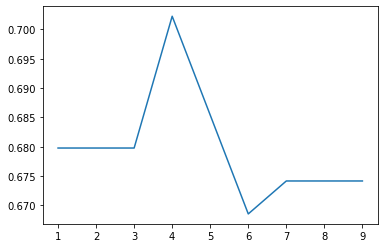

In [26]:
plt.plot(range(1, 10), prec2);

In [27]:
prec2=[]
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=1, metric='minkowski')
    knn.fit(X_train, y_train)
    y_hat2=knn.predict(X_test)
    prec2.append(calc_prec(y_hat2, y_test))

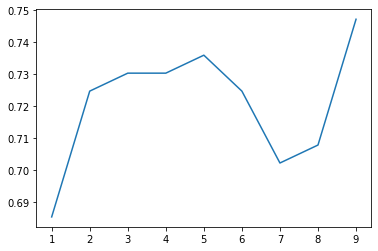

In [28]:
plt.plot(range(1, 10), prec2);

### Параметры против гиперпараметров

У модели есть определенные параметры, по которым она рассчитывается - возраст, пол, классность каюты, ...

Помимо этого есть параметры расчета самой модели. В нашем случае это количество соседей и метрика по которой рассчитывается расстояние. Меняя гиперпараметры модели можно изменять ее точность предсказания.

<img src="img/image_no_pay.png" width="600">

А теперь поиграем немного с параметрами.

In [29]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(train2, train2['Survived'])
y_hat3=knn.predict(train2)
calc_prec(y_hat3, train2['Survived'])

1.0

**Откуда получилась 100% точность?**

Теперь возьмем немного по-другому.

In [30]:
train3=train2.copy()
train3['PassengerId']=train['PassengerId']
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(train3.loc[:, 'Pclass' : 'PassengerId'], train3['Survived'])
y_hat3=knn.predict(train3.loc[:, 'Pclass' : 'PassengerId'])
calc_prec(y_hat3, train3['Survived'])

1.0

In [31]:
train3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId
0,0,3,1,22.0,1,0,7.2500,0.0,1
1,1,1,0,38.0,1,0,71.2833,1.0,2
2,1,3,0,26.0,0,0,7.9250,0.0,3
3,1,1,0,35.0,1,0,53.1000,0.0,4
4,0,3,1,35.0,0,0,8.0500,0.0,5


In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train3, train3['Survived'], test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(X_train2, y_train2)
y_hat3=knn.predict(X_test2)
print('test', calc_prec(y_hat3, train3['Survived']))

test 0.10573678290213723


Модель переобучилась на обучающей выборке, выучив все ответы. На новых задачах она не смогла дать ответ.

## Валидация и кросс-валидация

Обычно у нас есть только один набор данных, на котором необходимо натренировать модель. В этом случае (как это было показано выше) глупо тестировать модель на тех же данных, на которых она обучалась. В связи с этим мы разделяем наши данные на обучающую и тестовую выборки (для этого мы использовали функцию train_test_split). Но в этом случае получается, что выбранное тестовое множество само является гиперпараметром. Нам можно серьезно повезти с выбранными объектами, в результате чего точность была высокой. Помимо этого, мы могли переобучиться на свойства именно этого множества. При этом на реальных данных метод может показать плохие значения.

Для того, чтобы не привязываться к одному тестовому множеству проводят кросс-валидацию: либо разбивают всё множество на несколько и используют каждое из подмножеств в качестве тестового, либо каждый раз выделяют новое тестовое множество. Для модели в таком случае принято указывать не только среднюю точность по прогонам, но и дисперсию, показывающую устойчивость модели ко входным данным.

Однако при такой постановке задачи через какое-то время мы перепробуем все точки и в качестве обучения, и в качестве теста, то есть переобучим модель. В связи с этим от множества объектов заранее отделяют часть, которая не используется в ходе кросс-валидации, а необходима для окончательного тестирования модели.

![](img/cross-validation.jpg)

## Линейная регрессия

Еще одним классификатором является линейная регрессия, которая строит разделяющую гиперплоскость между точками.

<img src="https://cf.ppt-online.org/files/slide/p/PfMz46kb50YFJaVm1r8TSQWhg7p3XDoECxB2dq/slide-7.jpg" width="640">

Попробуем решить ту же задачу с помощью линейной регрессии.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.3906757205505991

В обученной можели можно посмотреть свойство `coef_`, которое показывает коэффициенты в обученной модели. Коэффициенты показывает углы наклона разделительной гиперплоскости по соответствующим осям. Угол наклона показывает насколько сильно зависит моедль именно от данного параметра. Таким образом, коэффициенты показывают важность параметров в модели.

In [35]:
list(zip(X_train.columns, reg.coef_)), reg.intercept_

([('Pclass', -0.15388035547676346),
  ('Sex', -0.5273006918789972),
  ('Age', -0.005466625597086258),
  ('SibSp', -0.039124313325785365),
  ('Parch', -0.012502412336865287),
  ('Fare', 0.000533543660351965),
  ('Embarked', 0.024449324814550442)],
 1.2463586927403736)

Как видно, чтобы спастись, нужно быть женщиной в каюте высокого класса желательно с родственниками.

<img src="img/titanic_save.png" width="640">

## Логистическая регрессия

Вместо того, чтобы просто строить разделительную линию, давайте считать, что эта линия проходит там, где вероятности принадлежности классам равны друг другу. По мере удаления от этой линии вероятность принадлежности классу изменяется по функции, называемой сигмоидой:
$$\sigma(z) = \frac{1}{1 + exp{(-z)}}.$$



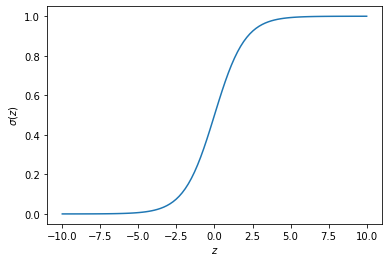

In [36]:
def sigmoid(z):
        return 1./(1. + np.exp(-z))

z = np.linspace(-10, 10, 100)

y = sigmoid(z)
plt.plot(z, y)
plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')

plt.show()

В итоге решение принимается не на основании информации о расположении выше/ниже прямой, а удаленности от нее.

<img src="img/prob.png" width="600">

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/edward/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
list(zip(X_train.columns, model.coef_[0])), model.intercept_[0]

([('Pclass', -0.7074053871387374),
  ('Sex', -2.493431899627824),
  ('Age', -0.025010239532976816),
  ('SibSp', -0.2483787386654679),
  ('Parch', -0.056647621795485714),
  ('Fare', 0.006190271326647558),
  ('Embarked', 0.14830609616371687)],
 3.292484669609405)

In [40]:
y_hat4=model.predict_proba(X_test)

In [41]:
model.score(X_test, y_test)

0.797752808988764

In [42]:
def plot_logreg_inter(inter):
    model.intercept_=inter
    y_hat4=model.predict_proba(X_test)
    print(inter, model.score(X_test, y_test))

In [43]:
fig = interact(plot_logreg_inter, inter=FloatSlider(min=0, max=10, value=1))

interactive(children=(FloatSlider(value=1.0, description='inter', max=10.0), Output()), _dom_classes=('widget-…

In [74]:
def plot_logreg_inter2(inter):
    model.intercept_=inter
    y_hat4=model.predict_proba(X_train)
    print(inter, model.score(X_train, y_train))
    
fig = interact(plot_logreg_inter2, inter=FloatSlider(min=0, max=10, value=1))

interactive(children=(FloatSlider(value=1.0, description='inter', max=10.0), Output()), _dom_classes=('widget-…

Здесь мы видим, что точность предсказания зависит от выбранного порогового значения. Если мы скажем, что спаслись все, у кого значение регрессии больше 0 (то есть вообще все), то мы корректно предскажем всех спасшихся, но все утонувшие будут некорректно предсказаны как спасшиеся.

<table><tr><td></td><td colspan=2>real class</td></tr>
<tr><td rowspan=2>predicted <br>class</td><td>0</td><td>100</td></tr>
<tr><td>0</td><td>100</td></tr></table>
В этом случае полнота работы системы будет 1, а точность будет зависеть от соотношения числа объектов в калссах.

Мы можем поступить по-другому, сказав, что спаслись все, у кого предсказаннео значение больше 1 (все утонули). Тогда мы получим обратную ситуацию - корректно предсткажем всех утонувших, но все спасшие будут предсказаны как утонувшие.
<table><tr><td></td><td colspan=2>real class</td></tr>
<tr><td rowspan=2>predicted <br>class</td><td>100</td><td>0</td></tr>
<tr><td>100</td><td>0</td></tr></table>
Если мы будем менять пороговое значение, то объекты будут переходить из одого класса в другой. График, показывающий зависимость перехода объектов между классами FP и TP называется ROC-кривой. Количество точек на ROC-кривой зависит от того, насколько дискретно объекты переходят из одного класса в другой (и, возможно, числа объектов). Так, если значения логистической регрессии для наших объектов может принимать значение лишь из множества [0, 0.5, 1], то на графике будет лишь три точки, две из которых расположатся в углах графика.

![](img/Receiver_Operating_Characteristic.png)

Например, у нас есть следующие предсказания для классификатора.

|Предсказанное значение|Истинный класс|
|-|-|
|0.1|0|
|0.15|0|
|0.2|0|
|0.25|1|
|0.3|0|
|0.4|0|
|0.5|1|
|0.55|0|
|0.6|1|
|0.9|1|

Тогда при пороге 0. TP=4/4, FP=6/6, при пороге 0.22 TP=4/4, FP=3/6, при пороге 0.27 TP=3/4, FP=3/6, ..., при пороге 0.56 TP=2/4, FP=0/2, при пороге 0.61 TP=1/6, FP=0/6, при пороге 0.91 TP=0/4, FP=0/6.

Классификатор, соответствующий диагонали, равноценен случайному угадыванию. Классификатор, график которого ниже диагонали, угадывает с точностью до наоборот.

Классификаторы можно сравнивать между собой по площади под ROC-кривой (Area Under Curve - AUC, ROC AUC).

ROC подходит только для бинарных классификаторов. Аналогичная метрика для многоклассовых классификаторов слишком сложна и не применяется.